<a href="https://colab.research.google.com/github/varshum12/DL-2-August-weekend-10-30/blob/main/DL_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as  np
import  pandas as  pd
import seaborn as  sns
import matplotlib.pyplot as plt
from warnings  import  filterwarnings
filterwarnings('ignore')



In [4]:
path  = '/content/Cars.xlsx'

In [5]:
df  = pd.read_excel(path  , keep_default_na= False  , na_values= ["" , "NA"])

#Basic  checks and quality checks

In [6]:
df.head()

,id1,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Toyota,Tercel,Small,7.8,9.8,11.8,32,37,Driver only,...,5,162,94,65,36,24.0,11.0,2055,non-USA,Toyota Tercel
1,2,Lexus,ES300,Midsize,27.5,28.0,28.4,18,24,Driver only,...,5,188,103,70,40,27.5,14.0,3510,non-USA,Lexus ES300
2,3,Subaru,Legacy,Compact,16.3,19.5,22.7,23,30,Driver only,...,5,179,102,67,37,27.0,14.0,3085,non-USA,Subaru Legacy
3,4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
4,5,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier


In [7]:
df.shape

(8556, 28)

In [8]:
df.columns

Index(['id1', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8556 entries, 0 to 8555
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id1                 8556 non-null   int64  
 1   Manufacturer        8556 non-null   object 
 2   Model               8556 non-null   object 
 3   Type                8556 non-null   object 
 4   Min.Price           8556 non-null   float64
 5   Price               8556 non-null   float64
 6   Max.Price           8556 non-null   float64
 7   MPG.city            8556 non-null   int64  
 8   MPG.highway         8556 non-null   int64  
 9   AirBags             8185 non-null   object 
 10  DriveTrain          8556 non-null   object 
 11  Cylinders           8556 non-null   object 
 12  EngineSize          8556 non-null   float64
 13  Horsepower          8556 non-null   int64  
 14  RPM                 8556 non-null   int64  
 15  Rev.per.mile        8556 non-null   int64  
 16  Man.tr

In [10]:
df.isnull().sum()

,0
id1,0
Manufacturer,0
Model,0
Type,0
Min.Price,0
Price,0
Max.Price,0
MPG.city,0
MPG.highway,0
AirBags,371


In [11]:
df.dtypes

,0
id1,int64
Manufacturer,object
Model,object
Type,object
Min.Price,float64
Price,float64
Max.Price,float64
MPG.city,int64
MPG.highway,int64
AirBags,object


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# drop  id  column
df.drop(['id1'] , axis =  1  , inplace  =  True)

# Seperate  x & y

In [14]:
x  =  df.drop(['Weight'] , axis =  1)
y =  df['Weight']

# seperate  cat  & num  data

In [15]:
df['Cylinders'].dtype

dtype('O')

In [16]:
df['Cylinders'].value_counts()

,count
Cylinders,
4,4492
6,2866
8,617
3,299
5,195
rotary,87


In [17]:
x['Cylinders'].replace({"rotary"  : 7} ,  inplace  = True)

In [18]:
x['Cylinders'] =  x['Cylinders'].astype('float64')


In [21]:
cat  = x.columns[x.dtypes  =='object']
num  =   x.columns[x.dtypes  !='object']

In [22]:
print(cat)
print()
print()
print(num)

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')


Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object')


# create  pipeline

In [23]:
x.dtypes

,0
Manufacturer,object
Model,object
Type,object
Min.Price,float64
Price,float64
Max.Price,float64
MPG.city,int64
MPG.highway,int64
AirBags,object
DriveTrain,object


In [24]:
from sklearn.pipeline import  Pipeline
from  sklearn.preprocessing import  StandardScaler ,  OrdinalEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.impute import  SimpleImputer

In [25]:
num_pipeline  =  Pipeline(steps = [('imputer' ,  SimpleImputer(strategy= 'mean')) ,
                                   ('scaler' ,  StandardScaler ()  )]   )
cat_pipeline  =  Pipeline(steps = [('imputer' ,  SimpleImputer(strategy= 'most_frequent' )) ,
                                   ('encoder' , OrdinalEncoder())])


In [26]:
pre = ColumnTransformer([('num' ,  num_pipeline ,  num )  , ('cat' ,  cat_pipeline , cat ) ])

In [28]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object'))])

In [ ]:
'Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'

IndentationError: unexpected indent (ipython-input-1164209932.py, line 2)

In [20]:
x["Model"].unique()


array(['Tercel', 'ES300', 'Legacy', 'Lumina_APV', 'Cavalier', 'Eurovan',
       'Festiva', 'Vision', 'Diamante', 'Justy', 'Grand_Prix', '100',
       'LeSabre', 'Century', '900', 'Eighty-Eight', 'Lumina', 'Metro',
       'Stealth', 'SL', 'Altima', 'Roadmaster', 'Cutlass_Ciera', '240',
       'Maxima', 'Caprice', 'Sentra', 'Previa', 'Legend', 'Spirit',
       'Taurus', 'Shadow', '90', 'Cougar', 'Fox', 'Firebird', 'Quest',
       'Camry', 'Sonata', 'Tempo', 'Dynasty', 'Bonneville', 'Corvette',
       'LeMans', 'Civic', 'SC300', 'Caravan', 'Continental', 'Protege',
       'Capri', 'Probe', '323', 'Town_Car', '850', 'Concorde', 'Escort',
       'Silhouette', 'Riviera', 'Accord', 'LeBaron', 'Achieva', '190E',
       'Swift', 'Corsica', 'Seville', 'Passat', 'Colt', 'Elantra',
       'Celica', 'Crown_Victoria', 'RX-7', 'Astro', 'Aerostar', 'Loyale',
       'Storm', '626', 'Q45', 'Excel', 'Summit', 'Integra', 'Mirage',
       'Sunbird', 'Mustang', 'DeVille', 'Scoupe', '535i', 'MPV', 'Camaro',


In [19]:
x['Model'] =  x['Model'].replace({100 : '100' , 900 : '900' ,  240 : '240' , 90 :  '90' ,  323 : '323' , 850 : '850' , 626  : '626' ,  } )

# fit  transform data

In [29]:
X  = pre.fit_transform(x)

# data frame

In [30]:
X  =  pd.DataFrame(X , columns  = pre.get_feature_names_out())

In [31]:
X

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__Cylinders,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,...,num__Rear.seat.room,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Man.trans.avail,cat__Origin,cat__Make
0,-1.065131,-1.008628,-0.923020,1.680241,1.461275,-0.751581,-1.126873,-1.180752,-0.127721,2.370666,...,-1.321164,-1.041774,29.0,90.0,3.0,1.0,1.0,1.0,1.0,86.0
1,1.181869,0.876793,0.587973,-0.776170,-0.949254,0.787374,0.330813,0.818523,-0.127721,-0.024507,...,-0.124851,0.043071,15.0,37.0,2.0,1.0,1.0,1.0,1.0,48.0
2,-0.095613,-0.003761,0.069138,0.101120,0.163298,-0.751581,-0.446619,-0.249051,0.548139,-0.014358,...,-0.295753,0.043071,27.0,54.0,0.0,1.0,0.0,1.0,1.0,80.0
3,-0.278111,-0.335263,-0.358673,-0.776170,-1.134679,0.787374,1.108245,0.527367,-0.803580,-1.313435,...,0.900561,0.000000,5.0,58.0,5.0,2.0,1.0,0.0,0.0,18.0
4,-0.985289,-0.635688,-0.331366,0.452036,1.275850,-0.751581,-0.446619,-0.637259,-0.127721,0.087133,...,-0.979360,-0.318544,5.0,21.0,0.0,2.0,1.0,1.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,-0.654512,-0.842877,-0.959430,0.452036,0.905000,-0.751581,-0.446619,-0.637259,-0.127721,0.665628,...,-0.637556,0.043071,5.0,29.0,0.0,1.0,1.0,1.0,0.0,15.0
8552,-0.494827,-0.573531,-0.613540,0.276578,0.163298,-0.751581,-0.640977,-0.540207,0.379174,0.005940,...,-1.662968,1.489531,10.0,67.0,4.0,1.0,1.0,1.0,0.0,35.0
8553,1.044996,0.700683,0.396823,-0.600712,-0.392978,0.787374,1.108245,0.527367,-0.803580,-1.313435,...,-0.466654,0.043071,3.0,72.0,2.0,1.0,1.0,0.0,0.0,7.0
8554,-1.019507,-1.091504,-1.095965,1.504784,2.202977,-0.751581,-1.029694,-1.336035,0.548139,1.609489,...,-0.808458,1.127916,24.0,52.0,3.0,2.0,1.0,1.0,0.0,75.0


#  split data  in training and testing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train  , x_test  ,  y_train  ,  y_test =  train_test_split(X  , y , test_size  = 0.2 ,  random_state= 34)

In [34]:
print(x_train.shape   , y_train.shape)
print(x_test.shape ,  y_test.shape)

(6844, 26) (6844,)
(1712, 26) (1712,)


# model  fitting

In [35]:
from  keras.models import  Sequential
from keras.layers import Dense , Input

In [ ]:
x_train.shape[1]

26

In [36]:
model  =  Sequential()

In [37]:
# add  input layer
model.add(Input(shape= (x_train.shape[1] ,)))

# hidden  layer

model.add(Dense(32 ,  activation= 'relu' ))
model.add(Dense(16 ,  activation= 'relu' ))

# output layer
model.add(Dense(1, activation= 'linear'))

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

# compile model

In [39]:
 model.compile(optimizer= 'adam' , metrics  = ['mae'] , loss =  'mse'   )

In [ ]:
# fit model

In [40]:
hist = model.fit(x_train  , y_train  ,  epochs= 50 ,
                 batch_size = 10 , verbose= 1  ,  validation_split= 0.2 )

Epoch 1/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7812499.5000 - mae: 2641.1265 - val_loss: 1528519.5000 - val_mae: 982.3258
Epoch 2/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1357142.8750 - mae: 937.5725 - val_loss: 1140191.1250 - val_mae: 863.3135
Epoch 3/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1085715.8750 - mae: 846.7010 - val_loss: 939642.5000 - val_mae: 772.2780
Epoch 4/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 909953.2500 - mae: 760.5027 - val_loss: 790834.5000 - val_mae: 701.0101
Epoch 5/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 750147.2500 - mae: 686.2274 - val_loss: 645144.3750 - val_mae: 630.5009
Epoch 6/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 628009.6250 - mae: 627.3458 - val_loss: 501334.2188 - val_mae: 560.8035
Epoch 7/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 471238.8438 - mae: 545.9149 - val_loss: 369853.6250 - val_mae: 489.2390
Epoch 8/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 359367.906

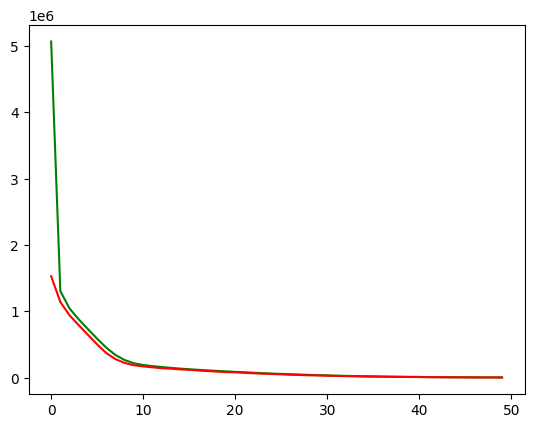

In [42]:
plt.plot(hist.history['loss'] ,  c = 'green')
plt.plot(hist.history['val_loss'] ,  c = 'red')

# training evaluation

In [43]:
train_pred    =   model.predict(x_train)

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [44]:
train_pred

array([[3681.2332],
       [2963.4475],
       [2413.1836],
       ...,
       [3489.9058],
       [3752.7817],
       [3425.4958]], dtype=float32)

In [45]:
from sklearn.metrics  import mean_absolute_error ,  mean_absolute_percentage_error ,  root_mean_squared_error , mean_squared_error , r2_score

In [46]:
def  evaluate(model  , x, y):
  y_pred  =  model.predict(x)
  MSE  = mean_squared_error(y ,  y_pred)
  MAE  = mean_absolute_error(y  ,  y_pred)
  RMSE  =  root_mean_squared_error(y ,  y_pred)
  r2 =  r2_score(y  , y_pred)

  print(f"MSE -- > {MSE} ")
  print(f"MAE -- > {MAE} ")
  print(f"RMSE -- > {RMSE} ")
  print(f"r2 -- > {r2}")




In [47]:
evaluate(model  , x_train  , y_train)

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MSE -- > 3087.71826171875 
MAE -- > 41.19260787963867 
RMSE -- > 55.56724166870117 
r2 -- > 0.9910881519317627


In [48]:
evaluate(model  , x_test  , y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE -- > 3066.599365234375 
MAE -- > 41.362239837646484 
RMSE -- > 55.37688446044922 
r2 -- > 0.9913001656532288


In [49]:
out_train  =   pd.DataFrame()
out_train['y_train'] =  y_train
out_train['pred']  = train_pred

In [51]:
out_train

,y_train,pred
5486,3695,3681.233154
5089,2890,2963.447510
930,2545,2413.183594
5574,3735,3877.011230
4851,3525,3541.243652
...,...,...
5667,2450,2459.840088
324,3495,3489.905762
3157,3495,3489.905762
5993,3785,3752.781738
